In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df=pd.read_csv("A:\Dataset\pokemon.csv\pokemon.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\astik\AppData\Local\Temp\ipykernel_9336\612739284.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("A:\Dataset\pokemon.csv\pokemon.csv")


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [11]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [13]:
df.drop(['Type 1','Type 2','Legendary'],axis=1,inplace=True)

In [15]:
df

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,318,45,49,49,65,65,45,1
1,2,Ivysaur,405,60,62,63,80,80,60,1
2,3,Venusaur,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1
4,4,Charmander,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,600,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,700,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,600,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,680,80,160,60,170,130,80,6


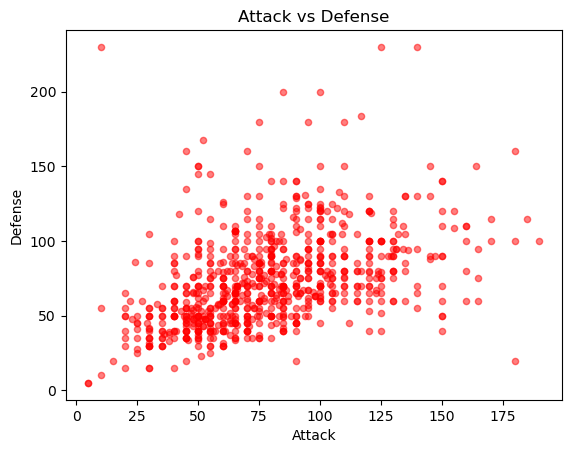

In [17]:
df.plot(kind='scatter',x='Attack',y='Defense',alpha=0.5,color='red')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs Defense')
plt.show()

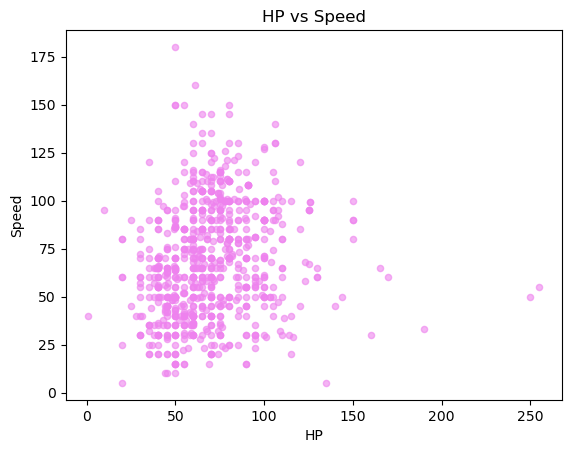

In [19]:
df.plot(kind='scatter',x='HP',y='Speed',alpha=0.6,color='violet')
plt.xlabel('HP')
plt.ylabel('Speed')
plt.title('HP vs Speed')
plt.show()

In [21]:
df_new=pd.get_dummies(df,columns=['Name'],drop_first=True)

In [23]:
df_new

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Name_AbomasnowMega Abomasnow,...,Name_Zangoose,Name_Zapdos,Name_Zebstrika,Name_Zekrom,Name_Zigzagoon,Name_Zoroark,Name_Zorua,Name_Zubat,Name_Zweilous,Name_Zygarde50% Forme
0,1,318,45,49,49,65,65,45,1,False,...,False,False,False,False,False,False,False,False,False,False
1,2,405,60,62,63,80,80,60,1,False,...,False,False,False,False,False,False,False,False,False,False
2,3,525,80,82,83,100,100,80,1,False,...,False,False,False,False,False,False,False,False,False,False
3,3,625,80,100,123,122,120,80,1,False,...,False,False,False,False,False,False,False,False,False,False
4,4,309,39,52,43,60,50,65,1,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,False,...,False,False,False,False,False,False,False,False,False,False
796,719,700,50,160,110,160,110,110,6,False,...,False,False,False,False,False,False,False,False,False,False
797,720,600,80,110,60,150,130,70,6,False,...,False,False,False,False,False,False,False,False,False,False
798,720,680,80,160,60,170,130,80,6,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
X=df_new.drop('Generation',axis=1)
y=df_new.Generation

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
from sklearn.model_selection import GridSearchCV
ml=svm.SVC()
para_grid={'C':[1,10,100,1000],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
grid=GridSearchCV(ml,para_grid,refit=True,verbose=1,cv=5,n_jobs=-1)
grid_search=grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [31]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [33]:
accuracy=grid_search.best_score_

In [35]:
accuracy

0.7678571428571429

In [37]:
y_pred=grid.predict(X_test)

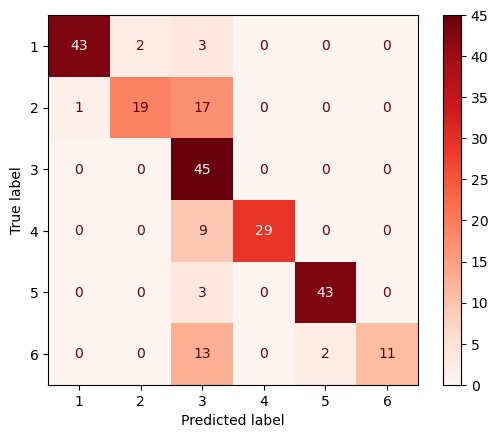

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid.classes_)
cmd.plot(cmap=plt.cm.Reds)
plt.show()

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.90      0.93        48
           2       0.90      0.51      0.66        37
           3       0.50      1.00      0.67        45
           4       1.00      0.76      0.87        38
           5       0.96      0.93      0.95        46
           6       1.00      0.42      0.59        26

    accuracy                           0.79       240
   macro avg       0.89      0.76      0.78       240
weighted avg       0.88      0.79      0.80       240



<Axes: xlabel='Attack', ylabel='Defense'>

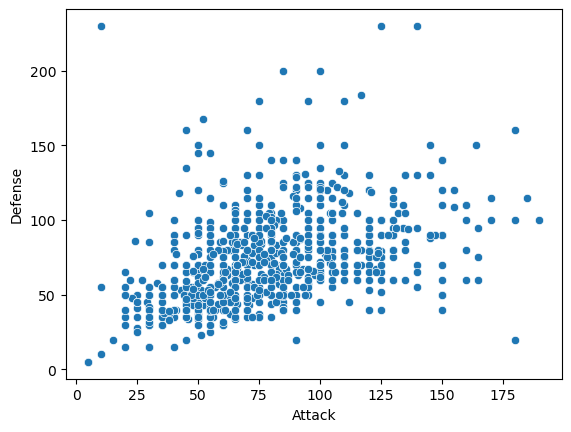

In [45]:
sns.scatterplot(x='Attack',y='Defense',data=df)

<Axes: xlabel='HP', ylabel='Speed'>

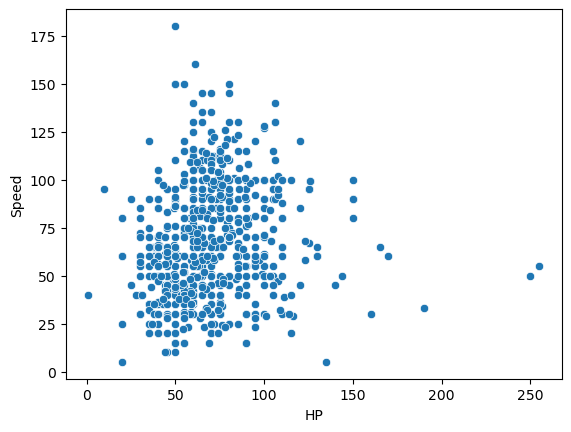

In [47]:
sns.scatterplot(x='HP',y='Speed',data=df)